
 Inception V3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/BE Project Final Dataset Transfer Learning/train'
valid_path = '/content/drive/MyDrive/BE Project Final Dataset Transfer Learning/val'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/BE Project Final Dataset Transfer Learning/train/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BE Project Final Dataset Transfer Learning/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3282 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BE Project Final Dataset Transfer Learning/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 932 images belonging to 13 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
103/103 [==============================] - 1460s 14s/step - loss: 3.2765 - accuracy: 0.6594 - val_loss: 4.0748 - val_accuracy: 0.5097
Epoch 2/10
103/103 [==============================] - 531s 5s/step - loss: 1.1049 - accuracy: 0.8199 - val_loss: 5.9366 - val_accuracy: 0.4710
Epoch 3/10
103/103 [==============================] - 518s 5s/step - loss: 0.7125 - accuracy: 0.8857 - val_loss: 5.8685 - val_accuracy: 0.4689
Epoch 4/10
103/103 [==============================] - 520s 5s/step - loss: 0.5991 - accuracy: 0.9055 - val_loss: 7.4418 - val_accuracy: 0.5021
Epoch 5/10
103/103 [==============================] - 523s 5s/step - loss: 0.6837 - accuracy: 0.8973 - val_loss: 12.1008 - val_accuracy: 0.4485
Epoch 6/10
103/103 [==============================] - 515s 5s/step - loss: 0.4896 - accuracy: 0.9250 - val_loss: 7.5313 - val_accuracy: 0.4957
Epoch 7/10
103/103 [==============================] - 510s 5s/step - loss: 0.5216 - accuracy: 0.9244 - val_loss: 6.8158 - val_accuracy: 0.5

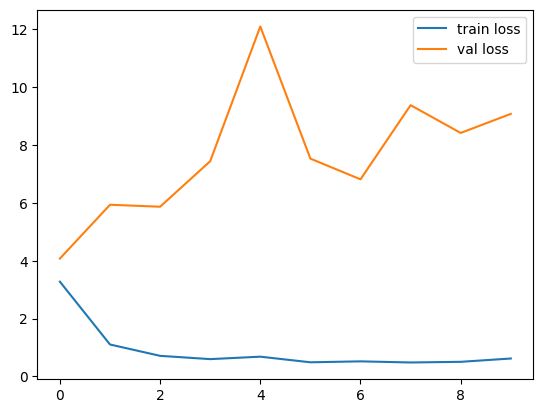

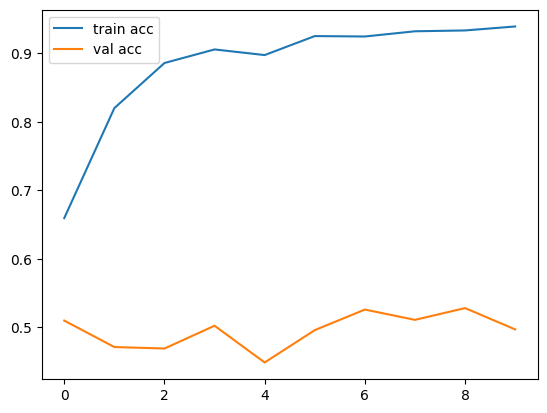

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'inceptionv3_model.hdf5')

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 114.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=7e3b0a75a73a072c83c37824d98b959ae739c9884dd32f31a7325a9481e864d0
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf



@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Cotton Crop Health Monitoring
         """
         )

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (224,224)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Writing app.py


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=15c7430aca4cb5f4971022665484dd5a99b2e76389dd32d460c3b1f4a3fd90aa
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!ngrok authtoken 29YNAcylnvZHn68Vssllc1lMxwr_n924eYKCqJiXyFNq6KT6

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok config add-authtoken 2PZmVtB8hVdgEx0OIP1016g3SWd_33hmmoCb5LjwPooeBbGtD

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &
     

nohup: appending output to 'nohup.out'


In [ ]:
!pip install pyngrok

In [ ]:
# from pyngrok import ngrok
# url=ngrok.connect(port=8501)
# url

from pyngrok import ngrok

# Start an HTTP tunnel
public_url = ngrok.connect(port=8501, proto='http')

# Print the public URL of the tunnel
print(public_url)


PyngrokNgrokHTTPError: ignored

In [ ]:
!cat /content/nohup.out

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-05-09 22:43:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  5.38MB/s    in 2.5s    

2023-05-09 22:44:01 (5.38 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
from pyngrok import ngrok

# Start a new Ngrok tunnel on port 8000
public_url = ngrok.connect(port='8000')

# Print the public URL of the tunnel
print('Public URL:', public_url)


PyngrokNgrokHTTPError: ignored

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c 'import sys, json; print("Execute the next cell and then go to the following URL: " + (json.load(sys.stdin)["tunnels"][0]["public_url"] if json.load(sys.stdin)["tunnels"] else "No tunnels found"))'


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.143.158.177:8502

  Stopping...
^C


In [ ]:
# # Saving the model for Future Inferences

# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")

In [ ]:
# imports

# #from keras import model_from_json 
# #tf.keras.models.model_from_json
# import tensorflow as tf

# # opening and store file in a variable

# json_file = open('model.json','r')
# loaded_model_json = json_file.read()
# json_file.close()

# # use Keras model_from_json to make a loaded model

# loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# # load weights into new model

# loaded_model.load_weights("model.h5")
# print("Loaded Model from disk")

# # compile and evaluate loaded model

# loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
